# TD Théorie de l'information 1

## Exercice 0 Etude de la fonction $x.log_2(x)$

## Graphe de la fonction

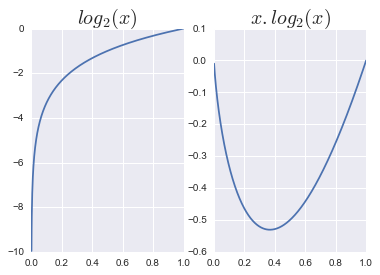

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

import warnings
warnings.simplefilter("ignore")

import numpy as np
from math import *
from sympy import init_printing

init_printing()

fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2)

x=np.linspace(0.000,1,1000)
ax1.plot(x,np.log2(x))  # utiliser np. car c'est la fonction log2 vectorisée de numpy
#ax1.ylabel("$log_2(x)$")
#ax1.xlabel("$x$")
ax1.set_title("$ log_2(x) $",fontsize=20)
ax2.plot(x,x*np.log2(x))  # utiliser np. car c'est la fonction log2 vectorisée de numpy
ax2.set_title("$ x.log_2(x)$",fontsize=20)


 se rappeler que $\lim_{x\to0} x.ln(x)=0$ et $\log_2(x)=\frac{ln(x)}{ln(2)}$

## Calcul de la dérivée

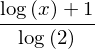

In [2]:
from sympy import * # Librarie de calcul symbolique 
x = symbols('x')
from IPython.display import display
# ci-dessous on re-ecrit log2(x) comme log(x)/log(2) pour aider sympy
display(simplify(diff(x*log(x)/log(2), x)) )  # Calcul de la derivee

## Trouver quand cette dérivée s'annule

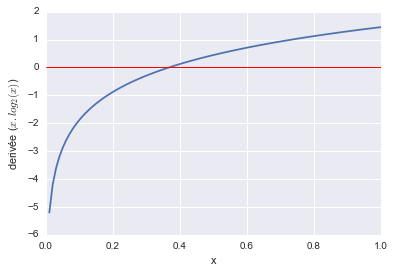

In [3]:
t=np.linspace(0.01,1,100)
plt.plot(t,(np.log(t)+1)/np.log(2))  
plt.plot([0, 1], [0, 0], color='r', linestyle='-', linewidth=1)
plt.ylabel('derivée ($x.log_2(x)$)')
plt.xlabel("x")
plt.show()

In [4]:
display(solve((log(x) + 1)/log(2),x))  # solve résoud l'équation (expression)=0 par rapport à la variable passée en 2eme paramètre

## Exercice 0.5 : la pièce à pile ou face, plus ou moins truquée

##### Ici on tire une pièce plus ou moins truquée et ** on calcule l'entropie de cette pièce ** selon la proba p de tirer pile (et proba 1-p de tirer face). Est-ce que ça ressemble au scénario de l'exercice 2 ?

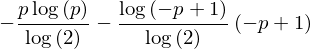

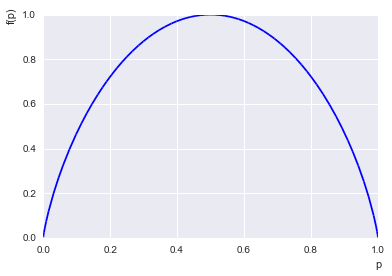

In [5]:
p = symbols('p')
entropie = -1* (p*log(p)/log(2) + (1-p)*log(1-p)/log(2))
display(entropie)
plot(entropie,(p,0,1)) # Le 2eme param. indique la variable et qu'on calcule pour p dans [0,1]

On calcule maintenant la dérivée de cette entropie pour regarder quand elle est maximale

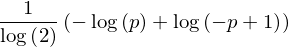

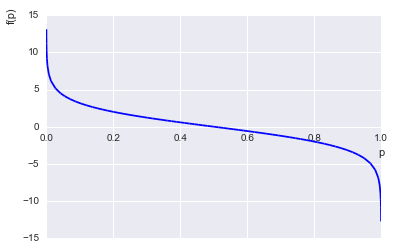

In [6]:
derivee_entropie=simplify(diff(entropie))     
display(derivee_entropie)
plot(derivee_entropie,(p,0,1))

On cherche maintenant quand la dérivée s'annule en utilisant la fonction solve
et on constate que l'entropie de la pièce est maximisée pour une pièce non truquée c.a.d. p =1/2, comme le montrait la figure précédente

In [7]:
display(solve(derivee_entropie,p))

# Exercice 2

Etant donné un nombre secret s, le choix d'un nombre n par le devineur correspond à une source dont un tirage produit 3 événéments possibles :
* "trop grand" : 0<=s<n (n chances sur 100)
* "gagné" : 1 (1 chance sur 100)
* "trop petit" : n+1<s<=99 (99-n chances sur 100)
De là, on peut calculer l'entropie.

(-n*log(n) + n*log(-n + 99) - 99*log(-n + 99))/log(2)
(-n/(-n + 99) - log(n) + log(-n + 99) - 1 + 99/(-n + 99))/log(2)


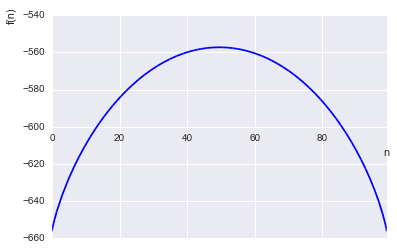

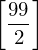

In [8]:
from sympy import Array
from sympy.abc import n
from sympy.functions import log
tableau_probas = Array([n, 1, 99-n])
tp=tableau_probas.applyfunc(lambda a:-1*a*log(a,2))
resu=simplify(expand(sum(tp)))
print(resu)
der = diff(resu)
print(der)
plot(resu,(n,0,99))
solve(der) # Ici le calcul du maximum

# Exercice 3

Calcul de l'entropie (sans approximation) :

In [9]:
tableau_probas  = [1/64,1/32,1/16,1/4,17/32,1/16,1/32,1/64]
print(sum(list(map(lambda x: -x*np.log2(x), tableau_probas))))

1.98478536559


On peut aussi utiliser une fonction fournie par la librairie scipy

In [10]:
from scipy.stats import entropy
print (entropy(a,base=2)) 

NameError: name 'a' is not defined

Si on veut faire l'opération à la main, pour se simplifier les calculs on approxime 17/32 par 16/32 et on obtient :

In [ ]:
tableau_probas_approximation  = [1/64,1/32,1/16,1/4,16/32,1/16,1/32,1/64]
print(sum(list(map(lambda x: -x*np.log2(x), tableau_probas_approximation))))

### Code à virgule 

In [ ]:
probas    = [17/32,1/4,1/16,1/16,1/32,1/32,1/64,1/64]
longueurs = [1,2,3,4,5,6,7,8]
longueur_code_virgule =np.dot(probas,longueurs)
print(longueur_code_virgule)

Huffmann donne :

* 0:00000
* 7:00001
* 1:00010
* 6:00011
* 2:0010
* 5:0011
* 3:01
* 4:1

In [ ]:
longueur_code_huffmann = 5/64+5/64+5/32+5/32+4/16+4/16+2/4+17/32
print(longueur_code_huffmann)

Shannon-Fano donne :
* 0:00000
* 7:00001
* 1:00010
* 6:00011
* 2:0010
* 5:0011
* 3:01
* 4:1

où on voit qu'on obtient le même code que avec Huffmann (donc la même longueur moyenne) mais c'est plutôt l'exception que la règle. On obtient une performance très proche de l'entropie mais, là aussi, c'est un cas assez particulier.